In [1]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

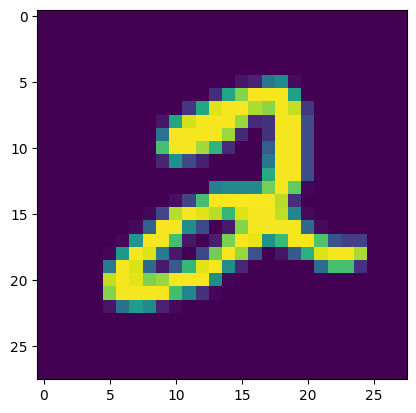

In [5]:
plt.imshow(x_train[5])
plt.show()

In [6]:
y_train[5]

2

In [7]:
# Preprocess input data
train_images = x_train.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = x_test.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [8]:
#Preprocess class labels
train_labels = keras.utils.to_categorical(y_train,10)
test_labels = keras.utils.to_categorical(y_test, 10)

In [9]:
#Define model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
# Compile model
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [11]:
#Fit model on training data
model_history=model.fit(train_images, train_labels,
          batch_size=128,
          epochs=5,validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 53s 140ms/step - loss: 0.2860 - accuracy: 0.9087 - val_loss: 0.1218 - val_accuracy: 0.9610
Epoch 2/5
375/375 [==============================] - 50s 132ms/step - loss: 0.0624 - accuracy: 0.9804 - val_loss: 0.0550 - val_accuracy: 0.9842
Epoch 3/5
375/375 [==============================] - 48s 128ms/step - loss: 0.0402 - accuracy: 0.9873 - val_loss: 0.0427 - val_accuracy: 0.9874
Epoch 4/5
375/375 [==============================] - 44s 116ms/step - loss: 0.0289 - accuracy: 0.9904 - val_loss: 0.0415 - val_accuracy: 0.9886
Epoch 5/5
375/375 [==============================] - 45s 120ms/step - loss: 0.0227 - accuracy: 0.9931 - val_loss: 0.0365 - val_accuracy: 0.9895


In [12]:
#Evaluate model on test data
score = model.evaluate(test_images,test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 11ms/step - loss: 0.0301 - accuracy: 0.9898
Test loss: 0.030064614489674568
Test accuracy: 0.989799976348877


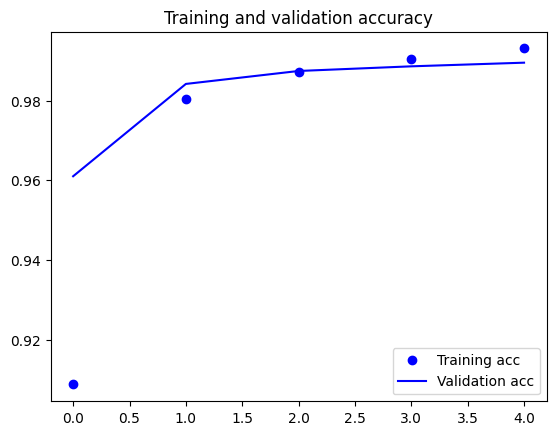

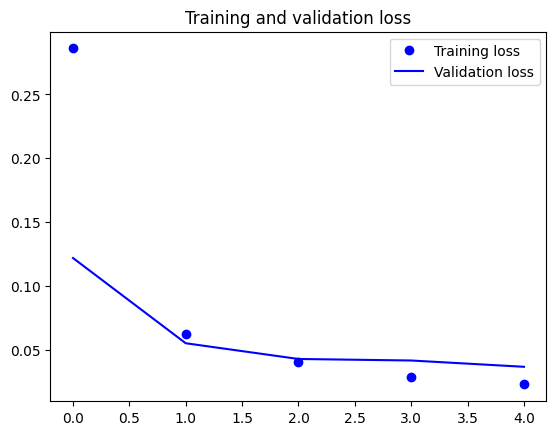

In [13]:
#comparing training and validation accuracy and loss
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()